In [18]:
import nltk
import sqlite3
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

con = sqlite3.connect('eng.db')

dataframe1 = pd.read_sql_query("""SELECT sid, cid, clemma, tag, tags FROM concept""",con)

In [17]:
#Following function to add average ambiguity (nlogn) and remove any blank tagged entries.
def rowchanger(datalist):
    sid, cid, clemma, tag, tags = datalist
    if not tags == None:
        newtags = tags.replace(";", "").split()
        avgAmbig = 1/len(newtags) * math.log(1/len(newtags)) *-1
    else:
        newtags = []
        avgAmbig = None
    return [sid, cid, clemma, tag, newtags, avgAmbig]

dataframe1 = dataframe1.apply(rowchanger, axis = 1, result_type = "expand")
dataframe1.rename(columns={0:"sid", 1:"cid", 2:"clemma", 3:"tag", 4:"newtags", 5:"avgAmbig"}, inplace=True)
print(dataframe1)

ValueError: too many values to unpack (expected 5)

In [6]:
#print(dataframe1["clemma"].value_counts())
    #THIS ONE IS FOR COUNTING


be              2916
a               1598
in              1518
have            1056
that             897
                ... 
face up            1
push back          1
stress             1
bungle             1
catch_phrase       1
Name: clemma, Length: 9187, dtype: int64


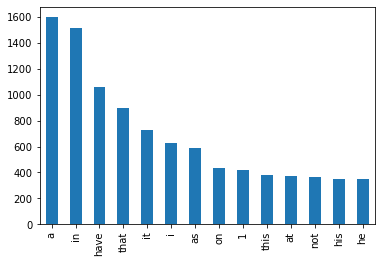

In [7]:

dataframe1["clemma"].value_counts()[1:15].plot(kind = "bar")
plt.show()



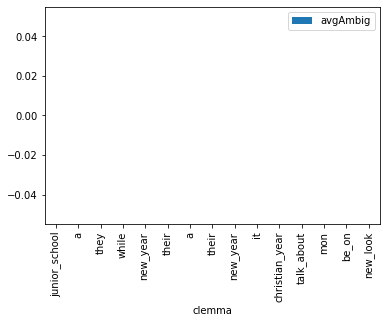

In [8]:
dataframe2 = dataframe1.sort_values("avgAmbig", na_position='last')
dataframe2[0:15].plot(x= "clemma", y ="avgAmbig", kind = "bar")
plt.show()

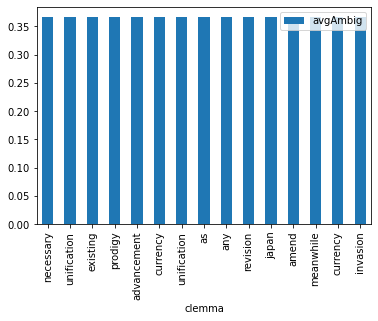

,sid,cid,clemma,tag,newtags,avgAmbig
14585,61233,37,necessary,01580050-a,"[01580050-a, 00343552-a, 09367203-n]",0.366204
15944,61330,24,unification,14418395-n,"[14418395-n, 07373602-n, 00381680-n]",0.366204
11207,60979,17,existing,00927017-a,"[01847101-a, 01731786-a, 00927017-a]",0.366204
6012,60472,9,prodigy,10479783-n,"[05939244-n, 07286368-n, 10479783-n]",0.366204
19443,61550,0,advancement,00249501-n,"[00249501-n, 00282050-n, 07251984-n]",0.366204


In [10]:
#remove anomalous tags
dataframe3 = dataframe1.sort_values("avgAmbig", ascending=False, na_position='last')
dataframe4 = dataframe3[dataframe3.tag != "e"]
dataframe4[0:15].plot(x= "clemma", y= "avgAmbig", kind = "bar")
plt.show()
dataframe4.head()

In [11]:
tagsDict = dataframe6["tag"].value_counts().to_dict()

def getTagFrequencyFromRow(row):
    return tagsDict.get(row["tag"],0)

dataframe6['TagFrequency'] = dataframe6.apply (lambda row: getTagFrequencyFromRow(row), axis=1)

newFrame = dataframe6[["tag","TagFrequency","avgAmbig"]].sort_values("TagFrequency", ascending = False)

print(newFrame[0:15])

#TODO: using this order, how do I display the avg ambig instead?

              tag  TagFrequency  avgAmbig
8823   02604760-v          1228  0.188504
1126   02604760-v          1228  0.188504
3496   02604760-v          1228  0.188504
35825  02604760-v          1228       NaN
14822  02604760-v          1228  0.188504
14833  02604760-v          1228  0.188504
14837  02604760-v          1228  0.188504
31560  02604760-v          1228       NaN
2963   02604760-v          1228  0.188504
14864  02604760-v          1228  0.188504
14883  02604760-v          1228  0.188504
1340   02604760-v          1228  0.188504
2933   02604760-v          1228  0.188504
2925   02604760-v          1228  0.188504
31923  02604760-v          1228       NaN


In [17]:
tagsDict = dataframe6["tag"].value_counts().to_dict()

highestAvgAmbigDict = dict()
values = {'avgAmbig': 0 }
dataframe6.fillna(value = values, inplace = True)

for rowTuple in dataframe6.iterrows():
    row = rowTuple[1]
    if row['tag'] == None:
        continue
    if highestAvgAmbigDict.get(row['tag']) == None:
        highestAvgAmbigDict[row['tag']] = [row['avgAmbig'],tagsDict[row['tag']]] 
    if abs(highestAvgAmbigDict[row['tag']][0]) < abs(row['avgAmbig']):
        highestAvgAmbigDict[row['tag']][0] = row['avgAmbig']


newFrame = pd.DataFrame.from_dict(highestAvgAmbigDict, orient='index', columns=['avgAmbig', 'Freq'])
newFrame.sort_values("Freq", ascending = False, inplace = True)
print(newFrame[0:15])

            avgAmbig  Freq
02604760-v  0.197304  1228
00024073-r -0.000000   371
77000015-n  0.346574   338
02664769-v  0.188504   294
77000031-n -0.000000   249
15203791-n  0.346574   245
per         0.346574   214
02603699-v  0.346574   188
77000039-a -0.000000   166
00047534-r  0.346574   157
02203362-v  0.149787   141
77000053-n -0.000000   136
77000021-n  0.346574   134
77000046-n  0.346574   133
01009240-v  0.244136   131


In [ ]:
#sum nlogn for entropy

    #check entropy scale limits

    #calculate average ambiguity, even distribution entropy, actual entropy
    #if ignoring 'weird' tags (eg x, w, etc), actual entropy including ALL tags
    #print top 10 bottom 10 for each
    #pick random words to check calculations are correct
    #check which words have most and least difference between pure random vs weighted
    #assume 0 for 0 AND/OR assume + 1/n for 0

    ##consider examining other corpora, differences between genres
